In [2]:
%matplotlib inline
import numpy.fft as fft
import numpy as np
import matplotlib.pyplot as plt

def single_aperture(width):
    def _aperture(x):
        if abs(x)<width/2:
            return 1.
        return 0.
    return _aperture

def grating(n, width, displacement):
    aperture = single_aperture(width)
    def _aperture(x):
        value = 0.
        for i in range(n):
            a = i - (n-1)/2
            value += aperture(x - displacement*a)
        return value
    return _aperture

def straight_edge(x):
    if x<0.:
        return 0.
    return 1.
        
def sinusoidal_grating(spacing, m, extent):
    d = extent
    s = spacing
    def grating(x):
        if abs(x) < d/2:
            return np.exp(1j * (m/2) * np.sin(2*np.pi*x/s))
        else:
            return 0
    return grating

def map_to_array(function, array):
    return np.array(list(map(function, array)))
        
def nearest_power_of_two(of):
    for n in range(100):
        if 2**n > of:
            return int((2**n)/2)
    return None

def analytical_single_slit(parameters, slit_width):
    x, D, wavelength, delta = parameters
    def single_slit(y):
        inside = np.pi*slit_width*y/(wavelength*D)
        return ((np.sin(inside)/inside)**2)
    return single_slit

def fresnel_correction(parameters):
    x, D, wavelength, delta = parameters
    k = 2*np.pi/wavelength
    def correction(element):
        return np.exp((1j*k*x[element[0]]**2)/2*D)*element[1]
    return correction

def fresnel_pattern(aperture, parameters):
    x, D, wavelength, delta = parameters
    correction = fresnel_correction(parameters = parameters)
    corrected_aperture = map_to_array(correction,
                                     enumerate(aperture))
    return fraunhofer_pattern(corrected_aperture, parameters)

def fraunhofer_pattern(aperture, parameters):
    x, D, wavelength, delta = parameters
    k = 2*np.pi/wavelength
    result_length = nearest_power_of_two(of = len(aperture))
    amplitude = fft.fft(aperture, result_length)
    amplitude = amplitude/amplitude[0]
    pattern = abs(amplitude)**2
    y = map_to_array(lambda element: ((element-result_length) * D * 2 * np.pi)/(k*result_length*delta) if element>result_length/2 
                          else (element * D * 2 * np.pi)/(k*result_length*delta),
            range(result_length))
    return y, pattern, amplitude

/Users/Taketomo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in double_scalars


(0.0, 1.5)

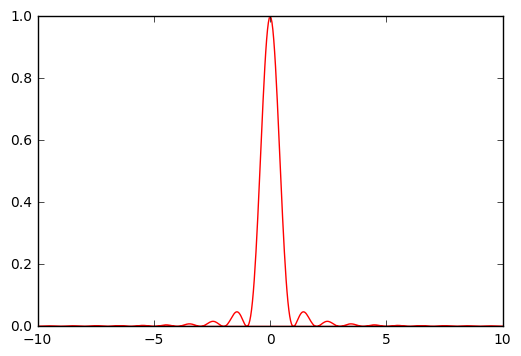

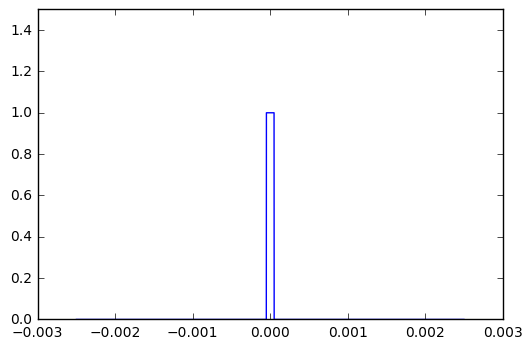

In [3]:
delta = 0.01 * 10**(-6)
slit_width = 100*10**(-6)
x_range = 5*(10**(-3))
num_elements = x_range/delta
D = 1.0
wavelength = 100 * 10**(-6)
x = map_to_array(lambda x: x - num_elements*delta/(2), 
                      np.arange(num_elements)*delta)
aperture_function = single_aperture(width = slit_width)
aperture = map_to_array(aperture_function, x)
parameters = (x, D, wavelength, delta)
y, pattern, amplitude = fraunhofer_pattern(aperture, parameters)
analytic = map_to_array(analytical_single_slit(parameters, slit_width), y)
plt.plot(y, pattern, 'r')
plt.xlim([-10.,10.])
#plt.xlim([-.1,.1])
plt.figure()
plt.plot(x, aperture)
plt.ylim([0.0, 1.5])

/Users/Taketomo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in double_scalars


(-0.0001, 0.0001)

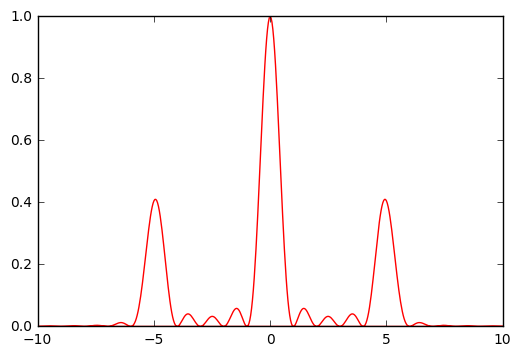

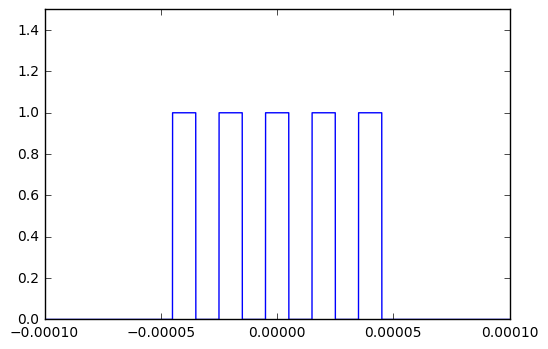

In [8]:
delta = 0.01 * 10**(-6)
slit_width = 10*10**(-6)
x_range = 5*(10**(-3))
num_elements = x_range/delta
D = 1.0
wavelength = 100 * 10**(-6)
x = map_to_array(lambda x: x - num_elements*delta/(2), 
                      np.arange(num_elements)*delta)
aperture_function = grating(n = 5, width = slit_width, displacement = 2*10**(-5))
aperture = map_to_array(aperture_function, x)
parameters = (x, D, wavelength, delta)
y, pattern, amplitude = fraunhofer_pattern(aperture, parameters)
analytic = map_to_array(analytical_single_slit(parameters, slit_width), y)
#plt.plot(y, analytic, 'g')
plt.plot(y, pattern, 'r')
plt.xlim([-10.,10.])
plt.figure()
plt.plot(x, aperture)
plt.ylim([0.0, 1.5])
plt.xlim([-10**(-4), 10**(-4)])

/Users/Taketomo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in double_scalars


(0.0, 1.5)

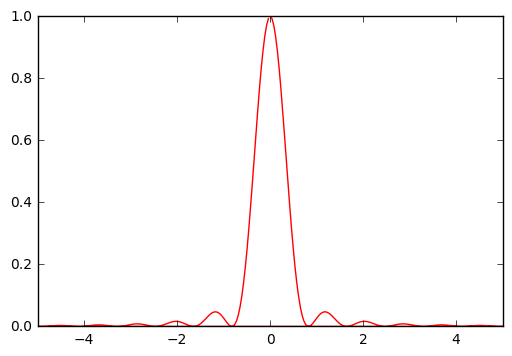

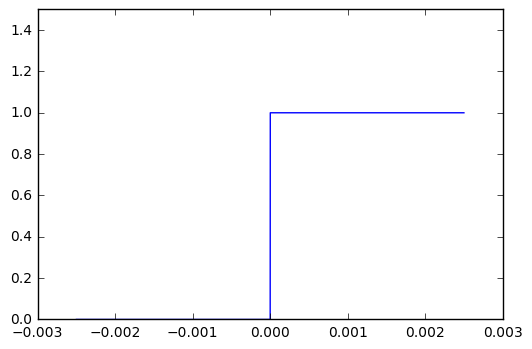

In [6]:
delta = 0.01 * 10**(-6)
slit_width = 100*10**(-6)
x_range = 5*(10**(-3))
num_elements = x_range/delta
D = 1.0
wavelength = 100 * 10**(-6)
x = map_to_array(lambda x: x - num_elements*delta/(2), 
                      np.arange(num_elements)*delta)
aperture_function = straight_edge
aperture = map_to_array(aperture_function, x)
parameters = (x, D, wavelength, delta)
y, pattern, amplitude = fresnel_pattern(aperture, parameters)
plt.plot(y, pattern, 'r')
plt.xlim([-5.,5.])
plt.figure()
plt.plot(x, aperture)
plt.ylim([0.0, 1.5])

/Users/Taketomo/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 1.5)

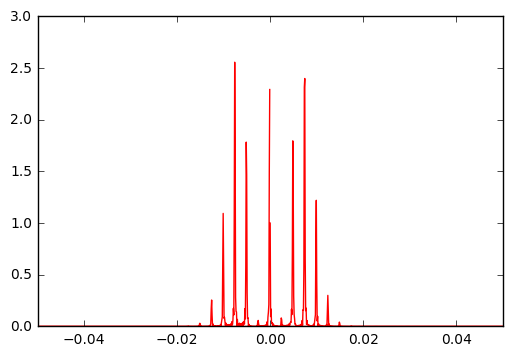

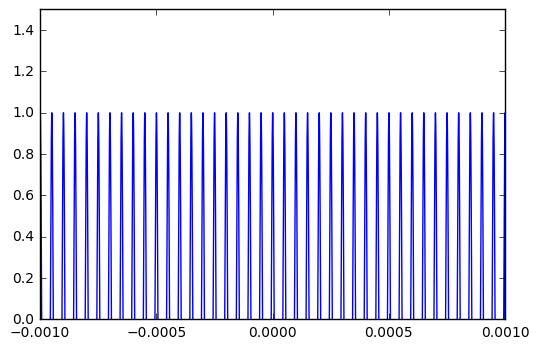

In [11]:
delta = 0.005 * 10**(-6)
spacing = 100 * 10**(-6)
extent = 2 * 10**(-3)
m = 8.
x_range = 5*(10**(-3))
num_elements = x_range/delta
D = 0.5
wavelength = 500 * 10**(-9)
x = map_to_array(lambda x: x - num_elements*delta/(2), 
                      np.arange(num_elements)*delta)
aperture_function = sinusoidal_grating(spacing, m, extent)
aperture = map_to_array(aperture_function, x)
parameters = (x, D, wavelength, delta)
y, pattern, amplitude = fresnel_pattern(aperture, parameters)
plt.plot(y, pattern, 'r')
plt.xlim([-.05,.05])
plt.figure()
plt.plot(x, aperture)
plt.xlim([-0.001, 0.001])
plt.ylim([0.0, 1.5])